In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import mutual_info_classif


In [2]:
# [9.1]
# Read reviews from the review100.csv. Tokenize each review using space key, so each review is represented as a set of tokens (words). 
# Use the top 1,000 most frequent tokens (words) as features to represent each review (so each review is represented as an instance with 1000 features).
# The value of each feature is 1 if the view has the corresponding token/word, or 0 otherwise. Use .head() to show the first several rows of the data frame. [0.5 pt]


# Read the review100.csv file
df = pd.read_csv('review100.csv')

# Tokenize the reviews using space key
vectorizer = CountVectorizer(max_features=1000, binary=True)
X = vectorizer.fit_transform(df['movie review']).toarray()
y = df['sentiment']

# Create a new DataFrame with the tokenized features
feature_names = vectorizer.get_feature_names_out()
df_tokenized = pd.DataFrame(X, columns=feature_names)

# Display the first several rows of the tokenized DataFrame
print(df_tokenized.head())

   10  15  20  25  70s  90s  about  absolutely  accepted  accurate  ...  \
0   0   0   0   0    0    0      1           0         0         0  ...   
1   0   0   0   0    0    0      1           0         0         0  ...   
2   0   0   0   0    0    0      0           0         0         0  ...   
3   1   0   0   0    0    0      0           0         0         0  ...   
4   0   0   0   0    0    0      1           0         0         0  ...   

   written  wrong  year  years  yes  yet  york  you  young  your  
0        0      0     0      0    0    0     0    1      0     1  
1        1      0     0      0    0    0     0    1      0     0  
2        0      0     0      1    0    0     0    0      1     0  
3        0      0     0      0    0    0     0    1      0     0  
4        0      0     0      0    0    0     1    0      0     0  

[5 rows x 1000 columns]


In [3]:
# [9.2] 
# Use 1 as the label of the positive review, and 0 as the label of the negative review 
# (so each review is represented using 1,000 features and a class label). 
# Use .head() to show the first several rows of the data frame. [0.5 pt]


# Assign labels 1 for positive reviews and 0 for negative reviews
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Display the first several rows of the DataFrame
df.head()


,movie review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


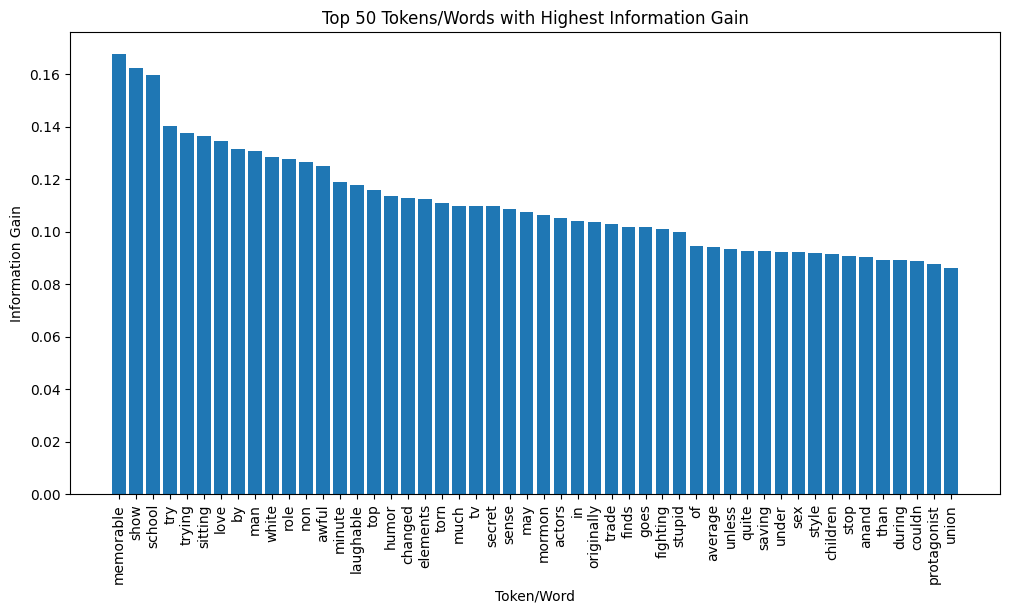

In [4]:
# [9.3]
# Calculate conditional entropy and information gain of each token/word, and report the top-50 tokens/words with the highest
# information gain values (as a bar plot, where x-axis shows the word and y-axis shows the information gain values) [0.5 pt]


# Read the CSV file and assign labels
df = pd.read_csv('review100.csv')
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Create a CountVectorizer object to convert text into a matrix of token counts
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['movie review']).toarray()
y = df['sentiment']

# Calculate the mutual information between each feature (token/word) and the class labels
information_gain = mutual_info_classif(X, y)

# Create a DataFrame to store the tokens/words and their corresponding information gain values
df_info_gain = pd.DataFrame({'Token': vectorizer.get_feature_names_out(), 'Information Gain': information_gain})

# Sort the DataFrame by the information gain values in descending order and select the top 50 tokens/words
top_50_tokens = df_info_gain.nlargest(50, 'Information Gain')

# Plot the bar chart showing the top 50 tokens/words and their information gain values
plt.figure(figsize=(12, 6))
plt.bar(top_50_tokens['Token'], top_50_tokens['Information Gain'])
plt.xticks(rotation=90)
plt.xlabel('Token/Word')
plt.ylabel('Information Gain')
plt.title('Top 50 Tokens/Words with Highest Information Gain')
plt.show()

